In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kuznets_curve.csv', sep = ',')

In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.head(3)

,Country Name,Variables,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,CO2 emissions (metric tons per capita),1.833636e-01,9.619658e-02,8.508711e-02,7.580649e-02,6.863986e-02,6.243461e-02,5.664234e-02,5.276322e-02,...,8.389281e-02,1.517209e-01,2.383985e-01,2.899876e-01,4.064242e-01,3.451488e-01,2.804546e-01,2.537279e-01,2.625557e-01,2.451014e-01
1,Afghanistan,GDP per capita (constant 2010 US$),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.055490e+02,4.120143e+02,4.883003e+02,5.433030e+02,5.287366e+02,5.761901e+02,5.875651e+02,5.836562e+02,5.741841e+02,5.710738e+02
2,Afghanistan,Urban population,2.828169e+06,3.093388e+06,3.391712e+06,3.677087e+06,3.916248e+06,4.093835e+06,4.220821e+06,4.321584e+06,...,6.263747e+06,6.464835e+06,6.680732e+06,6.927764e+06,7.212518e+06,7.528588e+06,7.865067e+06,8.204877e+06,8.535606e+06,8.852859e+06


In [5]:
df_ger = df[df['Country Name'].isin(['Germany'])]

In [6]:
df_iran = df[df['Country Name'].isin(['Iran, Islamic Rep.'])]

In [7]:
df_jap = df[df['Country Name'].isin(['Japan'])]

In [8]:
df_ger[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']] = df_ger[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']].apply(pd.to_numeric)

C:\Users\apari\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
df_ger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 511 to 517
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  7 non-null      object 
 1   Variables     7 non-null      object 
 2   1991          7 non-null      float64
 3   1992          7 non-null      float64
 4   1993          7 non-null      float64
 5   1994          7 non-null      float64
 6   1995          7 non-null      float64
 7   1996          7 non-null      float64
 8   1997          7 non-null      float64
 9   1998          7 non-null      float64
 10  1999          7 non-null      float64
 11  2000          7 non-null      float64
 12  2001          7 non-null      float64
 13  2002          7 non-null      float64
 14  2003          7 non-null      float64
 15  2004          7 non-null      float64
 16  2005          7 non-null      float64
 17  2006          7 non-null      float64
 18  2007          7 non-null      

In [10]:
df_ger = df_ger.drop(['Country Name', 'Variables'], axis = 1).T

In [11]:
df_ger.columns = ['CO2_pc_g', 'GDP_pc_g', 'pop_g', 'forest_%_g', 'forest_sqkm_g', 'energy_pc_g', 'renew_g']

In [12]:
df_ger.head(3)

,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
1991,11.622646,33839.490260,58625381.0,32.381635,113054.003906,4302.891175,1.988633
1992,11.063320,34228.998472,59146205.0,32.397101,113107.998047,4190.984220,2.062622
1993,10.814249,33672.543023,59647492.0,32.413497,113162.001953,4122.695740,2.110931


In [17]:
df_ger = df_ger.reset_index()

In [18]:
df_ger = df_ger.rename(columns = {'index':'date'})

In [20]:
df_ger

,date,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
0,1991,11.622646,33839.490260,58625381.0,32.381635,113054.003906,4302.891175,1.988633
1,1992,11.063320,34228.998472,59146205.0,32.397101,113107.998047,4190.984220,2.062622
2,1993,10.814249,33672.543023,59647492.0,32.413497,113162.001953,4122.695740,2.110931
3,1994,10.628392,34358.571996,60028206.0,32.429892,113215.996094,4088.798130,2.266202
4,1995,10.579467,34786.728549,60378049.0,32.446290,113270.000000,4119.688948,2.319749
5,1996,10.860234,34965.684451,60725922.0,32.462690,113324.003906,4246.553191,2.252174
6,1997,10.511113,35540.287527,60986289.0,32.481879,113377.998047,4203.357367,2.824422
7,1998,10.425273,36250.554957,61167004.0,32.500144,113432.001953,4177.294129,3.045119
8,1999,10.017759,36910.832726,61376500.0,32.519341,113485.996094,4079.933344,3.263712
9,2000,10.095640,37934.451783,61629857.0,32.537613,113540.000000,4094.060360,3.700438


In [22]:
df_ger['date'] = pd.to_datetime(df_ger['date'], format= '%Y')

In [23]:
df_ger.head(3)

,date,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
0,1991-01-01,11.622646,33839.490260,58625381.0,32.381635,113054.003906,4302.891175,1.988633
1,1992-01-01,11.063320,34228.998472,59146205.0,32.397101,113107.998047,4190.984220,2.062622
2,1993-01-01,10.814249,33672.543023,59647492.0,32.413497,113162.001953,4122.695740,2.110931


In [24]:
df_ger.set_index((df_ger['date']), inplace= True)
df_ger.drop(['date'], axis = 1, inplace= True)

In [30]:
df_ger.head(5)

,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
date,,,,,,,
1991-01-01,11.622646,33839.490260,58625381.0,32.381635,113054.003906,4302.891175,1.988633
1992-01-01,11.063320,34228.998472,59146205.0,32.397101,113107.998047,4190.984220,2.062622
1993-01-01,10.814249,33672.543023,59647492.0,32.413497,113162.001953,4122.695740,2.110931
1994-01-01,10.628392,34358.571996,60028206.0,32.429892,113215.996094,4088.798130,2.266202
1995-01-01,10.579467,34786.728549,60378049.0,32.446290,113270.000000,4119.688948,2.319749


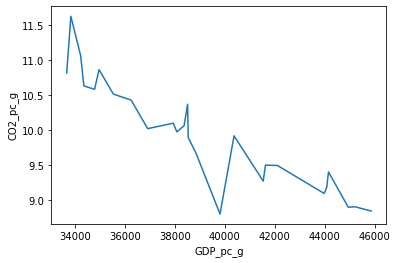

In [33]:
plot_ger = sns.lineplot(data=df_ger, x="GDP_pc_g", y="CO2_pc_g") 

In [34]:
df_iran[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']] = df_iran[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']].apply(pd.to_numeric)

C:\Users\apari\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
df_iran = df_iran.drop(['Country Name', 'Variables'], axis = 1).T

In [36]:
df_iran.columns = ['CO2_pc_g', 'GDP_pc_g', 'pop_g', 'forest_%_g', 'forest_sqkm_g', 'energy_pc_g', 'renew_g']

In [37]:
df_iran = df_iran.reset_index()

In [38]:
df_iran = df_iran.rename(columns = {'index':'date'})

In [39]:
df_iran['date'] = pd.to_datetime(df_iran['date'], format= '%Y')

In [40]:
df_iran.set_index((df_iran['date']), inplace= True)
df_iran.drop(['date'], axis = 1, inplace= True)

In [41]:
df_iran.head(5)

,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
date,,,,,,,
1991-01-01,3.942536,4541.098323,32799183.0,5.587698,91010.195312,1332.474968,1.226917
1992-01-01,3.886821,4582.330090,33888647.0,5.603023,91259.804688,1376.357362,1.449471
1993-01-01,3.971862,4556.851163,34949749.0,5.618348,91509.404297,1458.483260,1.528147
1994-01-01,4.377418,4423.762443,35978707.0,5.633672,91759.003906,1596.025285,1.086965
1995-01-01,4.442225,4461.995539,37010603.0,5.648997,92008.603516,1647.246431,1.018087


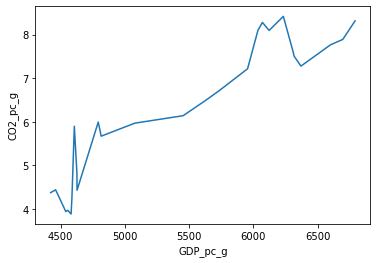

In [45]:
plot_iran = sns.lineplot(data=df_iran, x="GDP_pc_g", y="CO2_pc_g") 

In [46]:
df_jap[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']] = df_jap[['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
      '2015', '2016']].apply(pd.to_numeric)

C:\Users\apari\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
df_jap = df_jap.drop(['Country Name', 'Variables'], axis = 1).T

In [48]:
df_jap.columns = ['CO2_pc_g', 'GDP_pc_g', 'pop_g', 'forest_%_g', 'forest_sqkm_g', 'energy_pc_g', 'renew_g']

In [49]:
df_jap = df_jap.reset_index()

In [50]:
df_jap = df_jap.rename(columns = {'index':'date'})

In [51]:
df_jap['date'] = pd.to_datetime(df_jap['date'], format= '%Y')

In [52]:
df_jap.set_index((df_jap['date']), inplace= True)
df_jap.drop(['date'], axis = 1, inplace= True)

In [56]:
df_jap.head(5)

,CO2_pc_g,GDP_pc_g,pop_g,forest_%_g,forest_sqkm_g,energy_pc_g,renew_g
date,,,,,,,
1991-01-01,8.864025,39253.641841,96005316.0,68.410860,249425.996094,3575.246092,4.730569
1992-01-01,9.039672,39488.393435,96414127.0,68.390563,249351.992188,3649.944321,4.197715
1993-01-01,8.894837,39187.034538,96821759.0,68.370271,249278.007812,3664.568358,4.435607
1994-01-01,9.392974,39441.586762,97320876.0,68.349974,249204.003906,3850.962444,3.567646
1995-01-01,9.435087,40368.712282,97862490.0,68.329676,249130.000000,3935.994754,3.917189


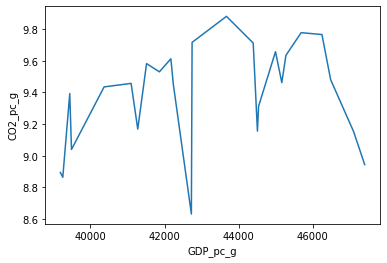

In [54]:
plot_japan = sns.lineplot(data=df_jap, x="GDP_pc_g", y="CO2_pc_g") 